<center><img src=img/MScAI_brand.png width=70%></center>

# More Plotting with Matplotlib and Seaborn

Data visualisation is an important step in almost every data analysis. In Python there are many plotting libraries, which all accept Numpy arrays and usually also Pandas DataFrames as input data. The main plotting library is **Matplotlib**, and we will see one other built on top of it, called **Seaborn**.

In [2]:
import numpy as np
import pandas as pd

<img src=img/matplotlib_logo_light.svg width=30%> 

* Foundational plotting library
* Can do everything, but is not easy

* https://matplotlib.org/ 
* Gallery/cookbook: https://matplotlib.org/gallery/index.html

In [3]:
import matplotlib.pyplot as plt

### Warning

There are at least three different ways of using `matplotlib`, which are confusing to mix.

* Pyplot stateful interface (we've been using this)
* Pyplot object-oriented interface (we'll see this next)
* Pylab (avoid this).

We've been mostly using the Pyplot **stateful** interface. Stateful means that it maintains important state behind the scenes: it knows which plot you're currently working on. A command like `plt.xlabel` changes the `x` label of whatever figure `plt` is currently working on.

We'll now see another way of working, the Pyplot object-oriented interface, which is a bit more powerful. Usually plotting starts with `fig, ax = plt.subplots()`. Now we use commands like `ax[0, 0].plot` to work on a specific plot (can work on multiple plots at once).
 
See [discussion here](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#Two-Interfaces-for-the-Price-of-One).


Let's just make some data for use in examples:

In [57]:
n = 61
x = np.linspace(0, 10, n, endpoint=True)
y = 1.7 * x + 12.3 * np.sin(3 * x)
yerr = 2 * np.random.uniform(0.3, 6, size=n)

### `plt.subplots`

Often we want to make multiple plots at the same time in a single image. This can be better than making multiple plots separately, because it ensures they are nicely aligned.

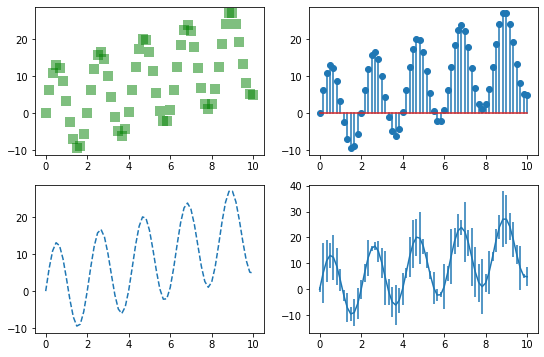

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(9, 6))

# 's' -> squares instead of lines
# alpha -> transparency
# markersize -> size
# markeredgewidth=0 -> remove borders on markers
ax[0, 0].plot(x, y, "s", color="g", alpha=0.5, 
         markersize=10, markeredgewidth=0)
ax[0, 1].stem(x, y) # an old version of this notebook had use_line_collection=True - that option is not needed in newer Matplotlib
ax[1, 0].plot(x, y, linestyle="--")
ax[1, 1].errorbar(x, y, yerr);

### Histograms

Of course we can make histograms. Choosing the number of bins can affect the outcome, so let's demo that.

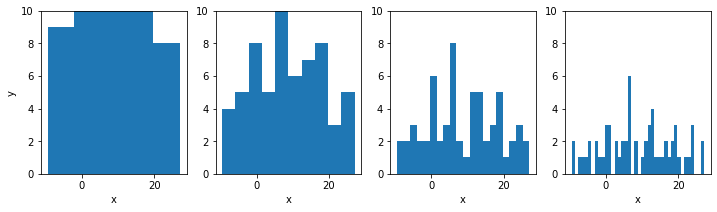

In [83]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
bins = (5, 10, 20, 40)
for i, b in enumerate(bins):
    ax[i].hist(y, bins=b)
    ax[i].set_xlabel('x') # sadly inconsistent with plt.xlabel in the simple case
    if i == 0:
        ax[i].set_ylabel('y')
    ax[i].set_ylim((0, 10))

### Using Pandas data

If we have a Pandas `DataFrame`, we can use it directly instead of extracting columns:


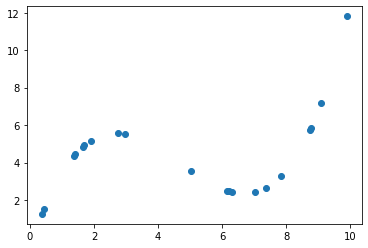

In [81]:
df = pd.read_csv("data/cell_growth.csv")
plt.scatter("x", "y", data=df);

<img src=img/seaborn-logo.png width=30%>

* Default styles are nicer
* Some "higher-level" plots are builtin which would take a lot of work in Matplotlib
* Complex plots take advantage of Pandas integration
* https://seaborn.pydata.org/
* Gallery/cookbook: https://seaborn.pydata.org/examples/index.html

In [1]:
import seaborn as sns

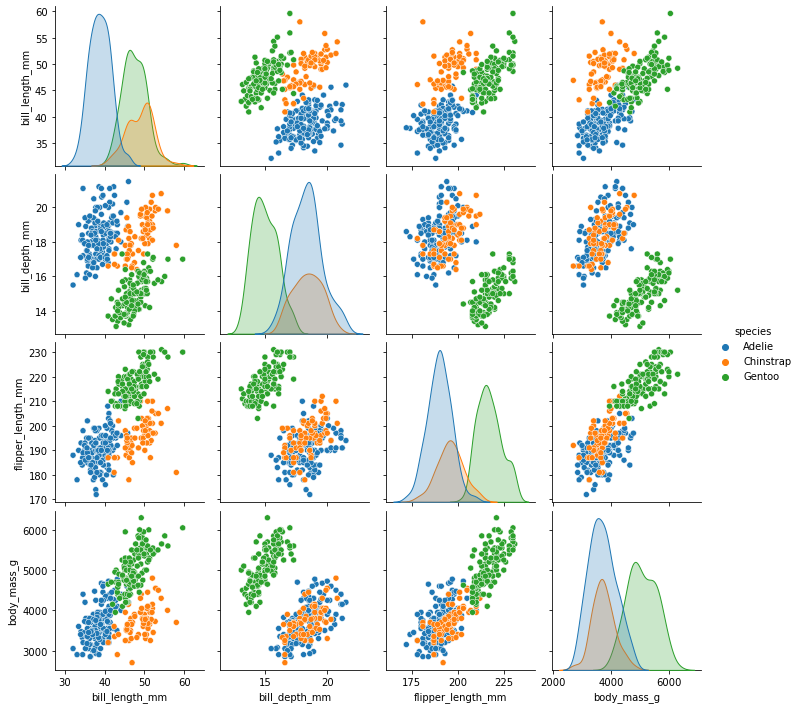

In [2]:
# example from https://seaborn.pydata.org/examples/scatterplot_matrix.html
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species");

As we can see, `sns.pairplot` takes in a whole Pandas DataFrame (multiple variables), and gives us:
* a scatterplot on each pair of variables (numeric variables only)
* a **kernel density estimation** -- like a smoothed histogram -- for each individual variable, on the diagonal
* optionally use another categorical variable to separate categories by colour (`hue`).

In [93]:
# from https://seaborn.pydata.org/examples/grouped_boxplot.html

# Load the example tips dataset: in a restaurant, how
# large was the bill on different days, separated by 
# smoker v non-smoker?
tips = sns.load_dataset("tips")
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

If we have both `x` and `hue`, `boxplot` knows we want a
**nested boxplot**. The `y` variable comes from `total_bill`.
So it shows the distribution of `total_bill`, separated by `x` (`day`) and `hue` (`smoker` Boolean). Each box shows the 1st and 3rd inter-quartile range; the line in the middle of the box is the median. The whiskers show the lower and upper bounds, except for a few outliers (there's a formula for calculating which points are outliers).


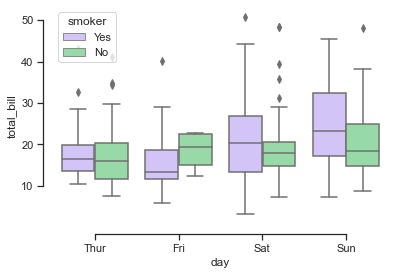

In [94]:
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
# try commenting the below line to see the difference
sns.despine(offset=10, trim=True)

One more example: a **kernel density** plot in two variables.

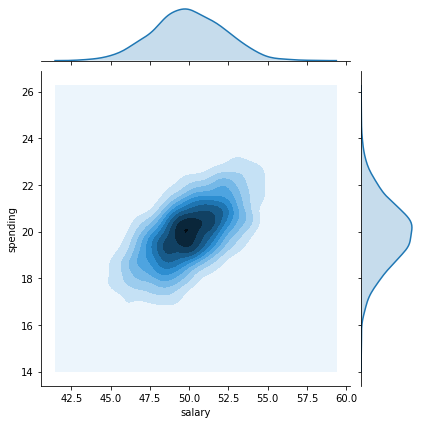

In [2]:
df = np.random.multivariate_normal(
    [50, 20], [[5, 2], [2, 2]], size=2000) # some fake data
df = pd.DataFrame(df, 
                  columns=["salary", "spending"])
# kde = kernel density estimation
sns.jointplot(x="salary", y="spending", 
              data=df, kind="kde");  

The interesting thing to notice in the above: if you look only at $x$, it looks like a normal distribution. If you look only at $y$, it looks like a normal distribution. But if you look at both together, you see there is a strong dependency between them.

### Further reading

Vanderplas has another very nice book (**Python Data Science Handbook**) with sections on Matplotlib and Seaborn (and Numpy, Pandas, and Scikit-Learn).

There is another module in data visualisation which goes much farther than we will here, but using R:

* CT5100 Data Visualisation
* CT5136 Data Visualisation - Online